<a href="https://colab.research.google.com/github/Sooryak12/overlap-finder-brance-task/blob/main/Overlap_Detection_Demonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Installation of Libraries :

In [ ]:
!pip install ultralytics

#### Importing Libraries :

In [ ]:
import pandas as pd
import numpy as np
import torch
import os
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow

#### Location of Images  :

In [ ]:
task_images =glob.glob("/content/input_images/*")

In [ ]:
if not os.path.exists("output_images"):  # Creates folder to store output images
    os.makedirs("output_images")

#### Downloading EAST model for Text Recognition :

In [ ]:
!git clone https://github.com/YCICI/EAST-OpenCv

Cloning into 'EAST-OpenCv'...
remote: Enumerating objects: 22, done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 22
Unpacking objects: 100% (22/22), 86.26 MiB | 9.82 MiB/s, done.


In [ ]:
# We will be only using the frozen_east_text_detection.pb model from it and a modifed code of text detection

#### Loading the YoloV5 Model :

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=False)  

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-16 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)



requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


#### Selection of Image : 

In [ ]:
index = 3

In [ ]:
print(task_images[index])

/content/input_images/6_Overlap.png


#### Bounding Boxes Prediction by Yolo Model :

In [ ]:
im = task_images[index]
results = model(im) #passing the image to model

In [ ]:
yolo_boxes=[]  # bounding box coordinates are saved here.
for i in range(len(results.crop())):
  bbox = [val.cpu().detach().numpy().astype("int")+0 for val in results.crop()[i]["box"]]  
  yolo_boxes.append(bbox)

Saved 1 image to runs/detect/exp63
Saved results to runs/detect/exp63

Saved 1 image to runs/detect/exp64
Saved results to runs/detect/exp64

Saved 1 image to runs/detect/exp65
Saved results to runs/detect/exp65



#### Display of Image with Yolo Bounding boxes :

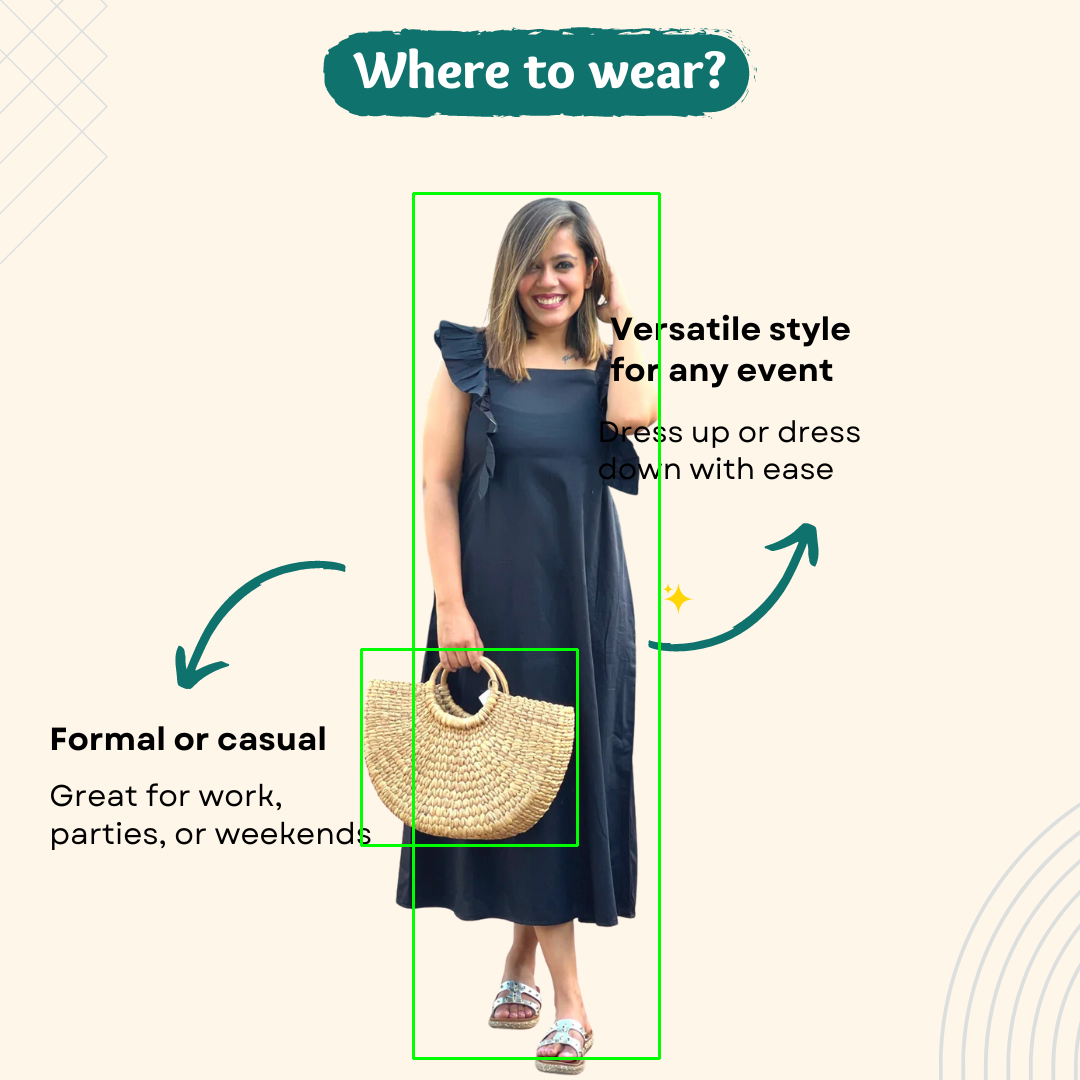

True

In [ ]:
image = cv2.imread(task_images[index])
for bbox in yolo_boxes:
  cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)
cv2_imshow(image)
cv2.imwrite("output_images/image_with_yolo_boxes.jpeg",image)

#### Prediction of Text Boxes with East Model :

In [ ]:
from text_detection import text_boxes
model_location = "/content/frozen_east_text_detection.pb"

In [ ]:
text_boxes = text_boxes(task_images[index],model_location)

Info rw  3.375
Info rH  3.375
[INFO] loading EAST text detector...
[INFO] text detection took 0.502739 seconds


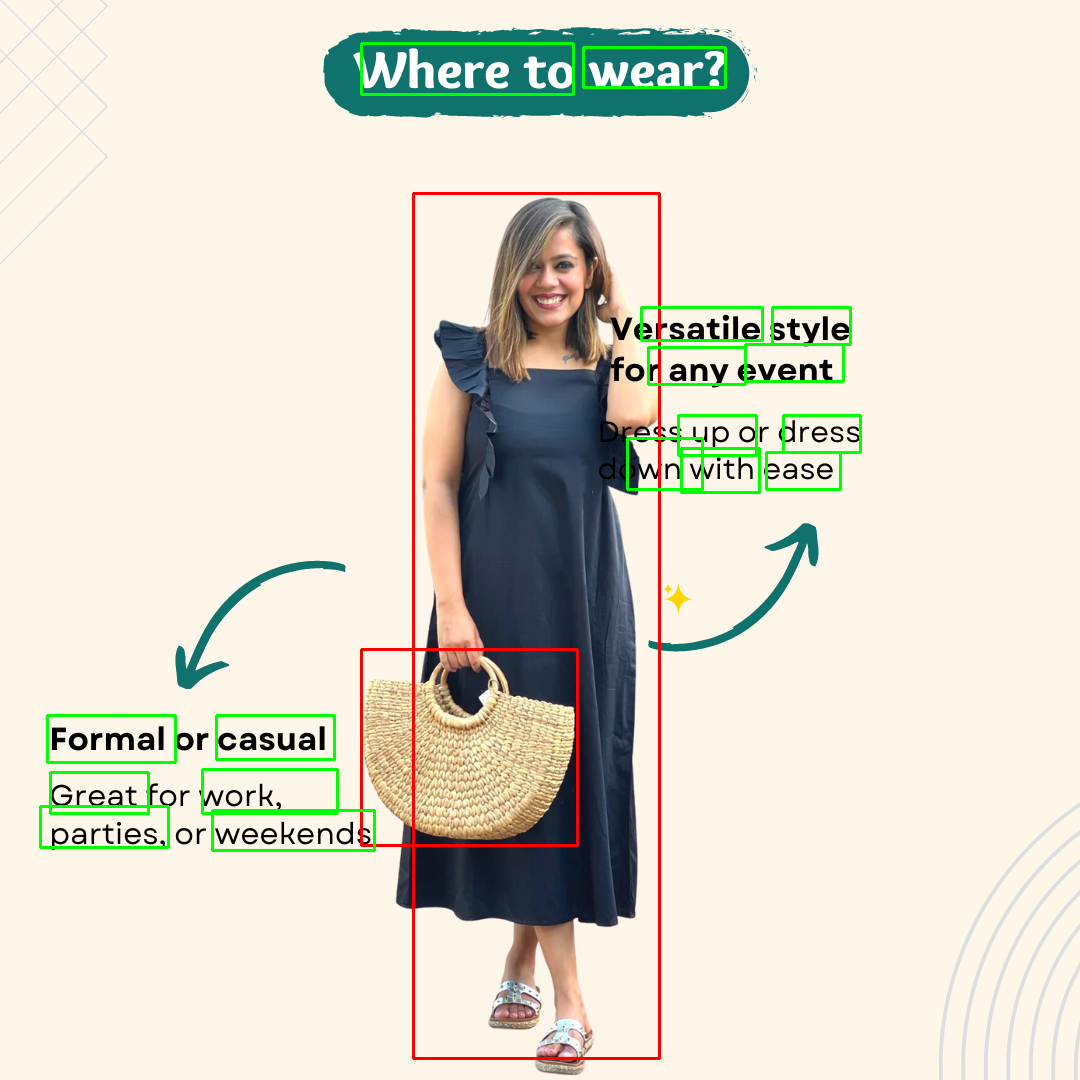

True

In [ ]:
orig=cv2.imread(task_images[index])
for (startX, startY, endX, endY) in yolo_boxes:
  cv2.rectangle(orig, (startX, startY), (endX, endY), (0,0 , 255), 2)
for (startX, startY, endX, endY) in text_boxes:
  cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 2)

cv2_imshow(orig)
cv2.imwrite("output_images/image_with_all_boxes.jpg",orig)

In [ ]:
from helper_functions import get_iou_and_intersection

In [ ]:
def overlap_detection(yolo_boxes,text_boxes):
  """ Function to calulcate intersecion over union and intersection area over each yolo box and textr box to help us determine
  if there is any overlap"""
  iou,inter=0,0
  for yolo_box in yolo_boxes:
    for text_box in text_boxes:
      iou_val,inter_val=get_iou_and_intersection(yolo_box,text_box)  #find intersection over union
      iou+=iou_val
      inter+=inter_val

      print(iou_val,inter_val)
  print("Final IOU:", iou )
  print("Final Intersection : ",inter)
  if inter > 1000 :
    print(" Overlap is there")
  else:
    print("No Overlap")

In [ ]:
overlap_detection(yolo_boxes,text_boxes)

0 0
0 0
0.010300850228907784 504
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0.002971426468694228 646
0.007939372067845544 1716
0 0
0 0
0 0
0 0
0 0
0 0
0.002099737532808399 456
0 0
0 0
Final IOU: 0.023311386298255955
Final Intersection :  3322
 Overlap is there


### Overlap Finder Script :

In [ ]:
! python overlap_finder.py -i /content/input_images/1_Overlap.png

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 2023-5-16 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
Saved 1 image to runs/detect/exp74
Saved results to runs/detect/exp74

Saved 1 image to runs/detect/exp75
Saved results to runs/detect/exp75

Info rw  3.375
Info rH  3.375
[INFO] loading EAST text detector...
[INFO] text detection took 0.722714 seconds
**************** Overlap is there ************
